In [166]:
# Importing the required packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import calendar

%matplotlib inline

In [58]:
# Importing the requisite data
patients = pd.read_excel('Example_data.xlsx', sheet_name='patients_table')
activity = pd.read_excel('Example_data.xlsx', sheet_name='activity_table')

# Creating datetime object for the available dates
patients['Admit Date'] = pd.to_datetime(patients['Admit Date'])
patients['Discharge Date'] = pd.to_datetime(patients['Discharge Date'])
patients['Procedure Date'] = pd.to_datetime(patients['Procedure Date'])

In [59]:
# Understanding the patients data
patients.head(10)

,MRN,Patient,Facility,Service Line,Admit Date,Discharge Date,Age,Phone,Email,Address,City,Zip,Country,Gender,Procedure Date
0,2709468722,Uriel George,Plainsboro,Cardiovascular,2017-02-13,2017-02-23,44,652-2234,purus@dolor.edu,Ap #913-7772 Nisi St.,Rigolet,5429,Syria,Male,2017-02-14
1,2702696605,Kiara Barnett,Plainsboro,Orthopedics,2017-01-19,2017-01-27,59,279-6509,orci.Phasellus@a.org,Ap #812-678 Ac Av.,Bidar,24358,Zimbabwe,Female,2017-01-20
2,3306518558,Denise Pate,Sacred Heart,Orthopedics,2017-07-04,2017-07-11,28,1-601-852-5086,ipsum.non@Suspendisseacmetus.org,"437-4210 In, Avenue",Albano di Lucania,G7A 7X0,Cocos (Keeling) Islands,Female,2017-07-05
3,2704682621,Solomon Alexander,Plainsboro,Orthopedics,2017-08-09,2017-08-12,19,394-2236,in.magna.Phasellus@pellentesquetellussem.co.uk,"P.O. Box 296, 4749 Fringilla Rd.",Dégelis,81519,Cayman Islands,Male,2017-08-09
4,2907030044,Blythe Pugh,Plainsboro,Orthopedics,2017-11-08,2017-11-18,27,298-8794,Duis.risus@et.com,"P.O. Box 497, 3405 Sollicitudin Street",Bonnyville,7618,Belarus,Female,2017-11-08
5,3008263908,Ronan Haney,Sacred Heart,Orthopedics,2017-01-12,2017-01-15,30,1-736-451-1631,magnis.dis.parturient@eleifend.com,259-8850 Ipsum Rd.,Beauvais,1391,Honduras,Male,2017-01-12
6,3101205049,Amena Knapp,Sacred Heart,Orthopedics,2017-10-31,2017-11-06,54,1-162-735-9589,consequat@ridiculusmusDonec.net,"8526 Erat, Street",Laval,49750,Martinique,Female,2017-10-31
7,2904316228,Noelle Strong,Plainsboro,Cardiovascular,2017-12-27,2017-12-30,46,1-703-379-4731,lacinia.orci.consectetuer@Aliquamfringilla.edu,"P.O. Box 211, 2020 Ultrices, St.",Coltauco,71804,Mayotte,Female,2017-12-28
8,2805281264,Ramona Meyers,Plainsboro,Maternity,2017-07-24,2017-08-02,60,1-620-603-4262,non@Namligulaelit.net,5792 Sapien. Rd.,Sant'Eufemia a Maiella,P9Z 9M7,Malaysia,Female,2017-07-25
9,2706380852,Dale Schmidt,Plainsboro,Orthopedics,2017-01-16,2017-01-23,44,405-1969,ut@est.org,Ap #772-6568 Vivamus Av.,Lo Prado,16481,Burkina Faso,Male,2017-01-16


In [25]:
# Understanding the activity data
activity.head(10)

,Activity ID,MRN,Activity Type,Activity State
0,1007627836,2806749524,Onsite Visit,completed
1,1001527219,2906754150,Post-call,completed
2,1009050333,2808696322,Onsite Visit,completed
3,1008971483,2907357587,Post-call,completed
4,1002947186,2701436744,Pre-call,completed
5,1008673195,2906176068,Onsite Visit,missed
6,1004922945,2703911819,Pre-call,completed
7,1001946247,2706380852,Pre-call,missed
8,1002876267,3004148480,Pre-call,missed
9,1008487598,2806638348,Onsite Visit,completed


# Excel Section

In [60]:
# Question 1 : How many patient admittances are in the patients_table report?
print ("Number of Patient Admittances = {}".format(patients['MRN'].count()))

Number of Patient Admittances = 1374


In [146]:
# Question 2 : How many maternity admittances were there at Sacred Heart in the month of June?
filter_sacred_heart = patients[patients['Facility']=='Sacred Heart']
filter_sacred_heart_maternity = filter_sacred_heart[filter_sacred_heart['Service Line'] == 'Maternity']
# Creating the month column in the view
filter_sacred_heart_maternity['month_number'] = filter_sacred_heart_maternity['Admit Date'].dt.strftime('%m').astype('int')
filter_sacred_heart_maternity_june = filter_sacred_heart_maternity[filter_sacred_heart_maternity['month_number'] == 6]
print ("Maternity Admittance in June : {}".format(filter_sacred_heart_maternity_june['MRN'].count()))

Maternity Admittance in June : 13


Text(0.5, 1.0, 'Month-wise maternity admittance at Sacred Heart')

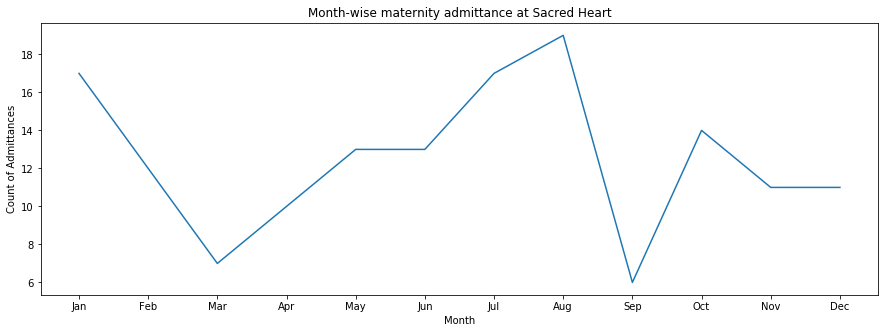

In [170]:
# Question 3 : What about the rest of the year? Build a line graph that shows how many maternity admittances there were at Sacred Heart, for each month of 2017
yearly_count = filter_sacred_heart_maternity[['MRN', 'month_number']].groupby('month_number').size()\
                        .reset_index(name='count').sort_values('month_number', ascending=True)['count']
months = [v for k,v in enumerate(calendar.month_abbr) if v !='']

plt.figure(figsize=(15, 5))
plt.plot(months, yearly_count)
plt.xlabel('Month')
plt.ylabel('Count of Admittances')
plt.title('Month-wise maternity admittance at Sacred Heart')

In [235]:
# Question 4 : Are there any patients who were admitted more than once to the same facility, in 2017? 
# If so, list their MRNs here; if not, confirm that there aren't any.

join_patients_activity = pd.merge(patients[['MRN', 'Facility']], activity[['MRN', 'Activity State']], 
                                 on='MRN')
join_patients_activity_completed = join_patients_activity[join_patients_activity['Activity State'] == 
                                                         'completed']
total_visits_per_patient = join_patients_activity_completed.groupby(['MRN', 'Facility']).size().reset_index(name='count')
patients_admitted_multiple_times = total_visits_per_patient[total_visits_per_patient['count'] > 1]['MRN']
print ("All MRNs of patients with multiple visit history : \n")
list(patients_admitted_multiple_times)

All MRNs of patients with multiple visit history : 



[2701153542,
 2701181062,
 2701378705,
 2701394560,
 2701436744,
 2701479726,
 2701493934,
 2701677385,
 2701695323,
 2701797584,
 2701827612,
 2701874608,
 2702007185,
 2702010537,
 2702047456,
 2702083528,
 2702088555,
 2702176851,
 2702201108,
 2702201396,
 2702375612,
 2702496387,
 2702544983,
 2702696605,
 2702749793,
 2702841565,
 2703212079,
 2703220675,
 2703292204,
 2703645293,
 2703737327,
 2703798503,
 2703822543,
 2703911819,
 2704225425,
 2704267633,
 2704342454,
 2704420802,
 2704499724,
 2704709238,
 2704760933,
 2704792198,
 2704800646,
 2705084813,
 2705218876,
 2705273180,
 2705381159,
 2705403415,
 2705501474,
 2705578532,
 2705872100,
 2705944167,
 2706148294,
 2706162544,
 2706181363,
 2706377984,
 2706380852,
 2706388138,
 2706431818,
 2706469380,
 2706601909,
 2706770676,
 2706858716,
 2706866055,
 2706882251,
 2707033962,
 2707036036,
 2707047745,
 2707077326,
 2707180104,
 2707263624,
 2707273250,
 2707437327,
 2707596333,
 2707596827,
 2707629804,
 2707651989,

# Tableau Section

Text(0.5, 1.0, 'Total admittance for each facility')

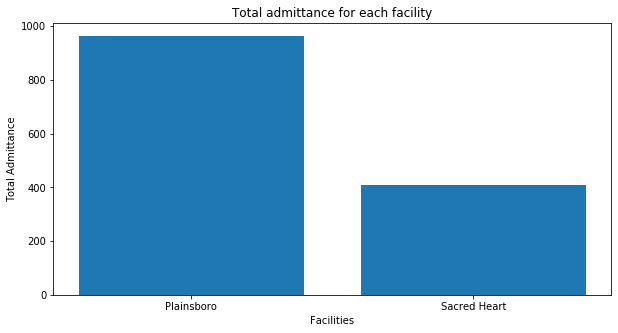

In [254]:
# Question 1 : Build a bar chart that compares the total number of admittances to Sacred Heart and Plainsboro
facility_view = patients[['MRN', 'Facility']].groupby('Facility').size().reset_index(name='count')

plt.figure(figsize=(10, 5))
plt.bar(facility_view['Facility'], facility_view['count'])
plt.xlabel('Facilities')
plt.ylabel('Total Admittance')
plt.title('Total admittance for each facility')

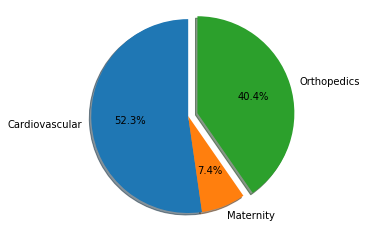

In [273]:
# Question 2 : Build a pie chart, that compares the number of admittances for each service line at Plainsboro. 
patients_plainsboro = patients[patients['Facility'] == 'Plainsboro']

patients_plainsboro_service_line = patients_plainsboro[['MRN', 'Service Line']].groupby('Service Line')\
                                    .size().reset_index(name='count')
_, ax = plt.subplots()
ax.pie(patients_plainsboro_service_line['count'], explode=(0, 0, 0.1), 
        labels=patients_plainsboro_service_line['Service Line'], autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal') 
plt.show()

In [286]:
# Question 3 : How many patients did we complete exactly 3 activities with? 
activity_completed = activity[activity['Activity State'] == 'completed'].groupby('MRN').size().reset_index(name='count')
activity_completed_thrice = activity_completed[activity_completed['count'] == 3]
print ("Total patients with exactly 3 activities completed = {}".format(activity_completed_thrice['MRN'].count()))

Total patients with exactly 3 activities completed = 131


In [340]:
# Question 4 : What % of all activities (completed or missed) for orthopedic patients at Plainsboro are completed?
join_patients_activity = pd.merge(patients[['MRN', 'Facility', 'Service Line', 'Discharge Date']], activity[['MRN', 'Activity State']], 
                                 on='MRN')
plainsboro_activity = join_patients_activity[join_patients_activity['Facility']=='Plainsboro']
plainsboro_activity_orthopedic = plainsboro_activity[plainsboro_activity['Service Line'] == 'Orthopedics']
plainsboro_activity_completed = plainsboro_activity_orthopedic[plainsboro_activity_orthopedic['Activity State'] == 'completed']['MRN'].count() / plainsboro_activity_orthopedic['MRN'].count()
print ("% of all activity for orthopedic patients at Plainsboro which are completed = {:.4f}".format(plainsboro_activity_completed*100))

% of all activity for orthopedic patients at Plainsboro which are completed = 61.4806


In [321]:
# Question 5 : Calculate the same for orthopedic patients at Sacred Heart. What's the difference between the two rates?
# Part - 1: 
sacred_heart_activity = join_patients_activity[join_patients_activity['Facility']=='Sacred Heart']
sacred_heart_activity_orthopedic = sacred_heart_activity[sacred_heart_activity['Service Line'] == 'Orthopedics']
sacred_heart_activity_completed = sacred_heart_activity_orthopedic[sacred_heart_activity_orthopedic['Activity State'] == 'completed']['MRN'].count() / sacred_heart_activity_orthopedic['MRN'].count()
print ("Part1: % of all activity for orthopedic patients at Plainsboro which are completed = {:.4f}".format(sacred_heart_activity_completed*100))
print ("Part2: Difference between the two rates = {:.4f}".format(abs(sacred_heart_activity_completed-plainsboro_activity_completed)*100))

Part1: % of all activity for orthopedic patients at Plainsboro which are completed = 63.1890
Part2: Difference between the two rates = 1.7084


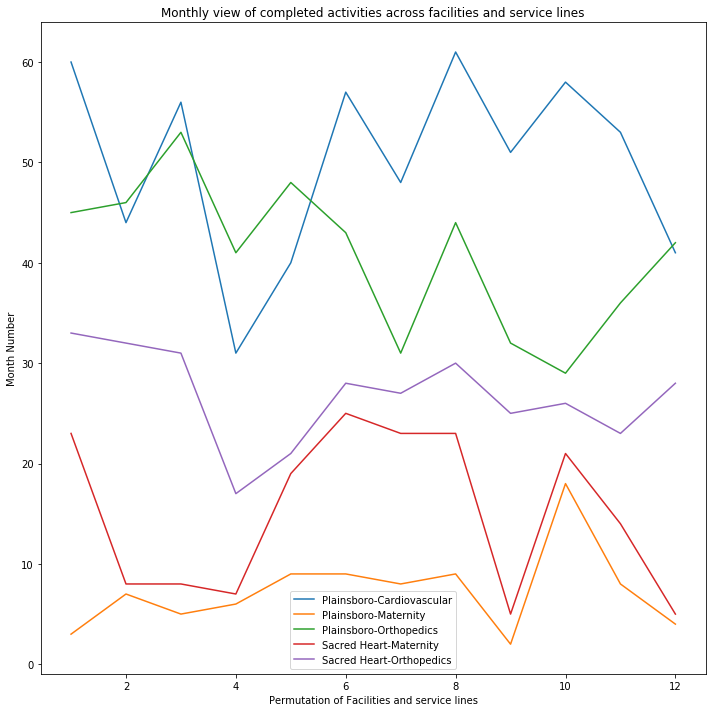

In [412]:
# Question 6 : Make a month-to-month line chart showing of the number of completed activities, for each permutation of 
# facility and service line 
join_patients_activity['month_number'] = join_patients_activity['Discharge Date'].dt.strftime('%m').astype('int')
join_patients_activity_completed = join_patients_activity[join_patients_activity['Activity State']=='completed']
monthly_view = join_patients_activity_completed.groupby(['Facility', 'Service Line', 'month_number']).size()\
                   .reset_index(name='count').sort_values('month_number', ascending=True)
monthly_view['month_name'] = [months[item-1] for item in list(monthly_view['month_number'])]
monthly_view['permutation'] = monthly_view['Facility'] + '-' + monthly_view['Service Line']
monthly_view_pivot = pd.pivot(monthly_view[['permutation', 'month_name', 'count', 'month_number']], 
                              index='month_number',
                              columns='permutation', values='count')
ax = monthly_view_pivot.plot(kind='line', figsize=(10, 10))
ax.legend(loc='best')
ax.set_ylabel('Month Number')
ax.set_xlabel('Permutation of Facilities and service lines')
ax.set_title('Monthly view of completed activities across facilities and service lines')
plt.tight_layout()
for p in ax.patches:
    if round(p.get_width(), 3) == 0.0:
        continue
    ax.text(p.get_width()*1.01, p.get_y()*1.01, str(round(p.get_width(), 3)))

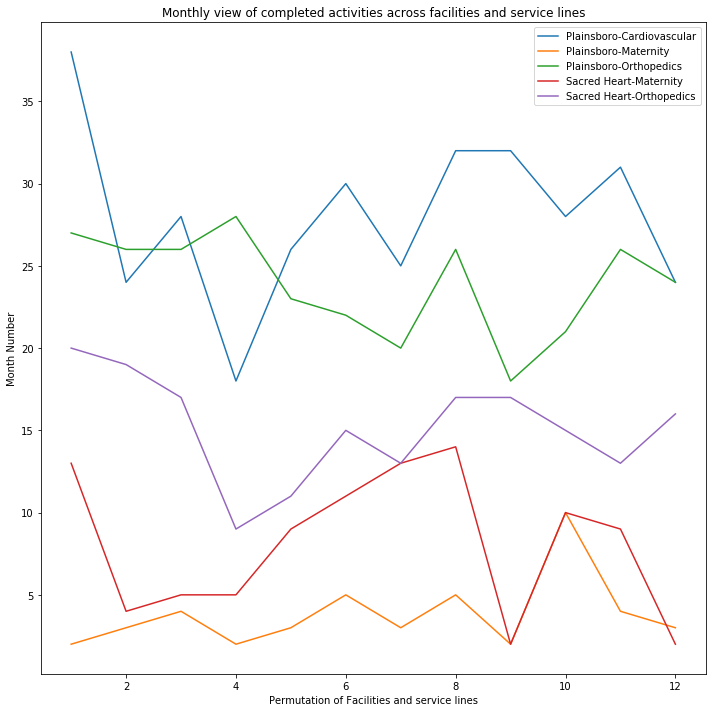

In [417]:
# Question 7: Replicate what you've made in (6), but scope the chart to only consider the first activity that is completed by a patient, filtering out any subsequent ones.
join_patients_activity_completed = join_patients_activity_completed.drop_duplicates(subset=['MRN'], keep='first')
monthly_view = join_patients_activity_completed.groupby(['Facility', 'Service Line', 'month_number']).size()\
                   .reset_index(name='count').sort_values('month_number', ascending=True)
monthly_view['month_name'] = [months[item-1] for item in list(monthly_view['month_number'])]
monthly_view['permutation'] = monthly_view['Facility'] + '-' + monthly_view['Service Line']
monthly_view_pivot = pd.pivot(monthly_view[['permutation', 'month_name', 'count', 'month_number']], 
                              index='month_number',
                              columns='permutation', values='count')
ax = monthly_view_pivot.plot(kind='line', figsize=(10, 10))
ax.legend(loc='best')
ax.set_ylabel('Month Number')
ax.set_xlabel('Permutation of Facilities and service lines')
ax.set_title('Monthly view of completed activities across facilities and service lines')
plt.tight_layout()
for p in ax.patches:
    if round(p.get_width(), 3) == 0.0:
        continue
    ax.text(p.get_width()*1.01, p.get_y()*1.01, str(round(p.get_width(), 3)))

# Logic Portion

In [470]:
final_results = []
final_results.append({'P':'P', 'Q':'Q', '~P':'~P', '~Q':'~Q', '~P V Q':'~P V Q', 'P ^ ~Q':'P ^ ~Q',
      '~(P V Q)': '~(P V Q)', '~P V ~Q': '~P V ~Q', '~P V (P ^ ~Q)': '~P V (P ^ ~Q)'})

dict_keys = ['P', 'Q', '~P', '~Q', '~P V Q', 'P ^ ~Q', '~(P V Q)', '~P V ~Q', '~P V (P ^ ~Q)']
res_vals = [
    ['T', 'T', 'F', 'F', 'T', 'F', 'F', 'F', 'F'],
    ['T', 'F', 'F', 'T', 'F', 'T', 'F', 'T', 'T'],
    ['F', 'T', 'T', 'F', 'T', 'F', 'F', 'T', 'T'],
    ['F', 'F', 'T', 'T', 'T', 'F', 'T', 'T', 'T']
]

for row in res_vals:
    tmp_dict = {}
    for idx in range(len(row)):
        tmp_dict[dict_keys[idx]] = row[idx]
    final_results.append(tmp_dict)
print (tabulate(final_results))

-  -  --  --  ------  ------  --------  -------  -------------
P  Q  ~P  ~Q  ~P V Q  P ^ ~Q  ~(P V Q)  ~P V ~Q  ~P V (P ^ ~Q)
T  T  F   F   T       F       F         F        F
T  F  F   T   F       T       F         T        T
F  T  T   F   T       F       F         T        T
F  F  T   T   T       F       T         T        T
-  -  --  --  ------  ------  --------  -------  -------------
